Лабораторная работа номер 4

Упражнение 1

In [29]:
import math

def metric_r0(a, b):
    dimension = len(a)
    distances = []
    for i in range(0, dimension):
        distances.append(abs(a[i] - b[i]))
    return max(distances)

def metric_r1(a, b):
    dimension = len(a)
    distances = 0
    for i in range(0, dimension):
        distances += (abs(a[i] - b[i]))
    return distances

def metric_r2(a, b):
    dimension = len(a)
    distances_sum = 0
    for i in range(dimension):
        distances_sum += (a[i] - b[i])**2
    return "{:.3f}".format(math.sqrt(distances_sum))

In [24]:
print('O(0, 0) A(3, 4)')
print('r0: ', metric_r0([0, 0], [3, 4]))
print('r1: ', metric_r1([0, 0], [3, 4]))
print('r2: ', metric_r2([0, 0], [3, 4]))

O(0, 0) A(3, 4)
r0:  4
r1:  7
r2:  5.000


In [25]:
print('O(0, 0) B(4, 3)')
print('r0: ', metric_r0([0, 0], [4, 3]))
print('r1: ', metric_r1([0, 0], [4, 3]))
print('r2: ', metric_r2([0, 0], [4, 3]))

O(0, 0) B(4, 3)
r0:  4
r1:  7
r2:  5.000


In [26]:
print('A(1, 2, 3, 4) B(7, 3, 4, 200)')
print('r0: ', metric_r0([1, 2, 3, 4], [7, 3, 4, 200]))
print('r1: ', metric_r1([1, 2, 3, 4], [7, 3, 4, 200]))
print('r2: ', metric_r2([1, 2, 3, 4], [7, 3, 4, 200]))

A(1, 2, 3, 4) B(7, 3, 4, 200)
r0:  196
r1:  204
r2:  196.097


Упражнение 2

In [83]:
import matplotlib.pyplot as plt

def closed_balloon(x0, r):
    points_metr0 = [(x*0.1, y*0.1) for x in range(-1000, 1000) for y in range(-100, 100) if metric_r0(x0, [x*0.1, y*0.1]) <= r]
    points_metr1 = [(x*0.1, y*0.1) for x in range(-1000, 1000) for y in range(-100, 100) if metric_r1(x0, [x*0.1, y*0.1]) <= r]
    points_metr2 = [(x*0.1, y*0.1) for x in range(-1000, 1000) for y in range(-100, 100) if float(metric_r2(x0, [x*0.1, y*0.1])) <= r]
    
    print('метрика R0')
    x_coords = [point[0] for point in points_metr0]
    y_coords = [point[1] for point in points_metr0]
    
    plt.scatter(x_coords, y_coords, color='g', s=5)
    plt.scatter(0, 0, color='red')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.show()
    
    print('метрика R1')
    x_coords = [point[0] for point in points_metr1]
    y_coords = [point[1] for point in points_metr1]
    
    plt.scatter(x_coords, y_coords, color='g', s=5)
    plt.scatter(0, 0, color='red')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.show()
    
    print('метрика R2')
    x_coords = [point[0] for point in points_metr2]
    y_coords = [point[1] for point in points_metr2]
    
    plt.scatter(x_coords, y_coords, color='g', s=5)
    plt.scatter(0, 0, color='red')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.show()

метрика R0


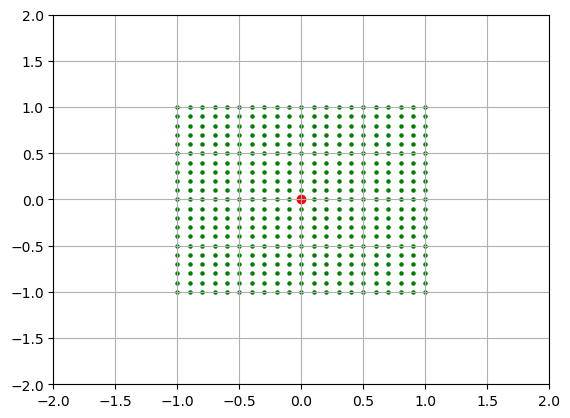

метрика R1


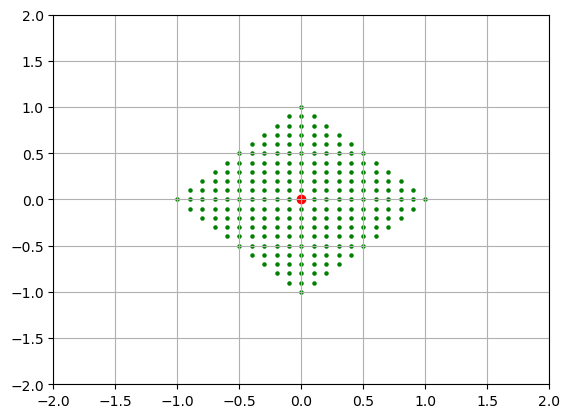

метрика R2


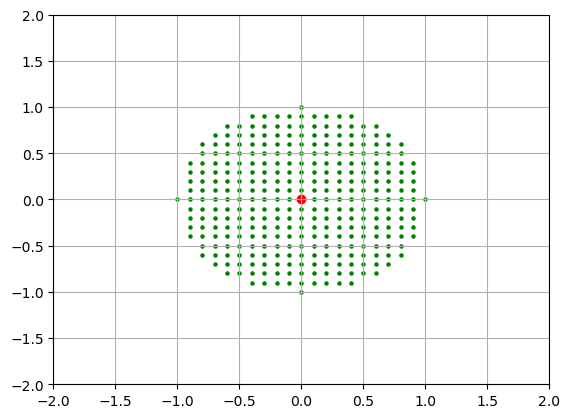

In [84]:
closed_balloon([0, 0], 1)

Упражнение 3

In [87]:
import math

def generate_sequence(x, n):
    if n == 0:
        return []
    else:
        next_term = math.tan(math.radians(x))
        return [next_term] + generate_sequence(math.degrees(next_term), n-1)

x1 = 3
sequence = generate_sequence(x1, 10)
for i, x in enumerate(sequence):
    print(f"x_{i+1} = {x}")

x_1 = 0.05240777928304121
x_2 = 0.05245581269256464
x_3 = 0.05250397839280468
x_4 = 0.052552276992056335
x_5 = 0.05260070910253735
x_6 = 0.05264927534042085
x_7 = 0.052697976325868194
x_8 = 0.05274681268306228
x_9 = 0.052795785040241086
x_10 = 0.052844894029731644


Члены последовательности медленно растут, соседние члены отличаются друг от друга на 0.00005. Ряд расходится, общий член не стремится к нулю.

Упражнение 4

In [90]:
def iterative_method(y, x0, e):
    def f(x):
        return eval(y)
    
    masV = []
    x1 = x0
    x2 = f(x1)
    p = abs(x1 - x2)
    n = 1

    while True:
        masV.append(x0)
        n += 1
        x0 = f(x0)
        x1 = x2
        x2 = f(x1)
        if abs(x1 - x2) < e:
            break

    print("Ряд приближений:\n")

    for i, val in enumerate(masV):
        print(f'x{i} = {val}')

    print(f'Корнем уравнения является {x0}')
    
    return x0, masV


r, val = iterative_method('(2*x + 1)**(1/5)', 1, 10**(-4))


Ряд приближений:

x0 = 1
x1 = 1.2457309396155174
x2 = 1.284107731796137
x3 = 1.289704497122498
x4 = 1.2905126470898418
Корнем уравнения является 1.2906291735254198


Упражнение 5

In [24]:
import numpy as np

A = np.array([[0.51, 0.4, 3.15],
              [4.17, 0.31, -0.31],
              [0.13, 5.32, 0.41]])

B = np.array([6.12, 5.34, 8.01])

rows, cols = A.shape
C = -A + np.eye(rows)
print(C)
print()

# проверка сжатости
sumsrows = []
sumscols = []
sumssquares = 0
for i in range(0, rows):
    summrow = 0
    summcol = 0
    for j in range(0, cols):
        summrow += abs(C[i][j])
        summcol += abs(C[j][i])
        sumssquares += (C[i][j])**2
    sumsrows.append(summrow)
    sumscols.append(summcol)
print(sumsrows, max(sumsrows))
print(sumscols, max(sumscols))
print(sumssquares)
if (max(sumsrows) < 1) or (max(sumscols) < 1) or (np.sqrt(sumssquares) < 1):
    print('условие сжатости матрицы выполнено')
else: print('условие сжатости матрицы не выполнено')
print()


# поменяем матрицы
for i in range (0,3):
    A[0,i]/=6.12
    B[0]/=6.12
    A[1,i]/=5.34
    B[1]/=5.34
    A[2,i]/=8.01
    B[2]/=8.01

C = -A + np.eye(rows)
print(C)

sumsrows = []
sumscols = []
sumssquares = 0
for i in range(0, rows):
    summrow = 0
    summcol = 0
    for j in range(0, cols):
        summrow += abs(C[i][j])
        summcol += abs(C[j][i])
        sumssquares += (C[i][j])**2
    sumsrows.append(summrow)
    sumscols.append(summcol)
print(sumsrows, max(sumsrows))
print(sumscols, max(sumscols))
print(sumssquares)
if (max(sumsrows) < 1) or (max(sumscols) < 1) or (np.sqrt(sumssquares) < 1):
    print('условие сжатости матрицы выполнено')
else: print('условие сжатости матрицы не выполнено')
print()

[[ 0.49 -0.4  -3.15]
 [-4.17  0.69  0.31]
 [-0.13 -5.32  0.59]]

[4.04, 5.169999999999999, 6.04] 6.04
[4.79, 6.41, 4.05] 6.41
56.951100000000004
условие сжатости матрицы не выполнено

[[ 0.91666667 -0.06535948 -0.51470588]
 [-0.78089888  0.94194757  0.05805243]
 [-0.01622971 -0.66416979  0.94881398]]
[1.4967320261437909, 1.7808988764044944, 1.6292134831460676] 1.7808988764044944
[1.7137952559300873, 1.6714768304325476, 1.5215722993317176] 1.7137952559300873
3.9515430248937875
условие сжатости матрицы не выполнено



In [31]:
# переставим уравнения
A = np.array([[0.13, 5.32, 0.41],
              [0.51, 0.4, 3.15],
              [4.17, 0.31, -0.31]])

B = np.array([8.01, 6.12, 5.34])

rows, cols = A.shape
C = -A + np.eye(rows)
print(C)
print()

# проверка сжатости
sumsrows = []
sumscols = []
sumssquares = 0
for i in range(0, rows):
    summrow = 0
    summcol = 0
    for j in range(0, cols):
        summrow += abs(C[i][j])
        summcol += abs(C[j][i])
        sumssquares += (C[i][j])**2
    sumsrows.append(summrow)
    sumscols.append(summcol)
print(sumsrows, max(sumsrows))
print(sumscols, max(sumscols))
print(sumssquares)
if (max(sumsrows) < 1) or (max(sumscols) < 1) or (np.sqrt(sumssquares) < 1):
    print('условие сжатости матрицы выполнено')
else: print('условие сжатости матрицы не выполнено')
print()

# поменяем матрицы
for i in range (0,3):
    A[0,i]/=8.01
    B[0]/=8.01
    A[1,i]/=6.12
    B[1]/=6.12
    A[2,i]/=5.34
    B[2]/=5.34

C = -A + np.eye(rows)
print(C)

sumsrows = []
sumscols = []
sumssquares = 0
for i in range(0, rows):
    summrow = 0
    summcol = 0
    for j in range(0, cols):
        summrow += abs(C[i][j])
        summcol += abs(C[j][i])
        sumssquares += (C[i][j])**2
    sumsrows.append(summrow)
    sumscols.append(summcol)
print(sumsrows, max(sumsrows))
print(sumscols, max(sumscols))
print(sumssquares)
if (max(sumsrows) < 1) or (max(sumscols) < 1) or (np.sqrt(sumssquares) < 1):
    print('условие сжатости матрицы выполнено')
else: print('условие сжатости матрицы не выполнено')
print()

[[ 0.87 -5.32 -0.41]
 [-0.51  0.6  -3.15]
 [-4.17 -0.31  1.31]]

[6.6000000000000005, 4.26, 5.789999999999999] 6.6000000000000005
[5.55, 6.2299999999999995, 4.87] 6.2299999999999995
58.9711
условие сжатости матрицы не выполнено

[[ 0.98377029 -0.66416979 -0.05118602]
 [-0.08333333  0.93464052 -0.51470588]
 [-0.78089888 -0.05805243  1.05805243]]
[1.6991260923845193, 1.5326797385620914, 1.8970037453183521] 1.8970037453183521
[1.8480024968789013, 1.6568627450980393, 1.6239443342880224] 1.8480024968789013
4.289613084378255
условие сжатости матрицы не выполнено



In [32]:
# переставим уравнения
A = np.array([[0.51, 0.4, 3.15],
              [0.13, 5.32, 0.41],
              [4.17, 0.31, -0.31]])

B = np.array([6.12, 8.01, 5.34])

rows, cols = A.shape
C = -A + np.eye(rows)
print(C)
print()

# проверка сжатости
sumsrows = []
sumscols = []
sumssquares = 0
for i in range(0, rows):
    summrow = 0
    summcol = 0
    for j in range(0, cols):
        summrow += abs(C[i][j])
        summcol += abs(C[j][i])
        sumssquares += (C[i][j])**2
    sumsrows.append(summrow)
    sumscols.append(summcol)
print(sumsrows, max(sumsrows))
print(sumscols, max(sumscols))
print(sumssquares)
if (max(sumsrows) < 1) or (max(sumscols) < 1) or (np.sqrt(sumssquares) < 1):
    print('условие сжатости матрицы выполнено')
else: print('условие сжатости матрицы не выполнено')
print()

# поменяем матрицы
for i in range (0,3):
    A[0,i]/=6.12
    B[0]/=6.12
    A[1,i]/=8.01
    B[1]/=8.01
    A[2,i]/=5.34
    B[2]/=5.34

C = -A + np.eye(rows)
print(C)

sumsrows = []
sumscols = []
sumssquares = 0
for i in range(0, rows):
    summrow = 0
    summcol = 0
    for j in range(0, cols):
        summrow += abs(C[i][j])
        summcol += abs(C[j][i])
        sumssquares += (C[i][j])**2
    sumsrows.append(summrow)
    sumscols.append(summcol)
print(sumsrows, max(sumsrows))
print(sumscols, max(sumscols))
print(sumssquares)
if (max(sumsrows) < 1) or (max(sumscols) < 1) or (np.sqrt(sumssquares) < 1):
    print('условие сжатости матрицы выполнено')
else: print('условие сжатости матрицы не выполнено')
print()

[[ 0.49 -0.4  -3.15]
 [-0.13 -4.32 -0.41]
 [-4.17 -0.31  1.31]]

[4.04, 4.86, 5.789999999999999] 5.789999999999999
[4.79, 5.03, 4.87] 5.03
48.37109999999999
условие сжатости матрицы не выполнено

[[ 0.91666667 -0.06535948 -0.51470588]
 [-0.01622971  0.33583021 -0.05118602]
 [-0.78089888 -0.05805243  1.05805243]]
[1.4967320261437909, 0.4032459425717852, 1.8970037453183521] 1.8970037453183521
[1.7137952559300875, 0.4592421238158184, 1.6239443342880224] 1.7137952559300875
2.9577852221472205
условие сжатости матрицы не выполнено



In [34]:
A = np.array([[-8.41, -0.23, -1.67], [-0.23, -9.31, 1.41], [-1.89, -1.24, -10.27]])
B = np.array([[8.23], [4.26], [-7.51]])

rows, cols = A.shape
C = -A + np.eye(rows)
print(C)
print()

sumsrows = []
sumscols = []
sumssquares = 0
for i in range(0, rows):
    summrow = 0
    summcol = 0
    for j in range(0, cols):
        summrow += abs(C[i][j])
        summcol += abs(C[j][i])
        sumssquares += (C[i][j])**2
    sumsrows.append(summrow)
    sumscols.append(summcol)
print(sumsrows, max(sumsrows))
print(sumscols, max(sumscols))
print(sumssquares)
if (max(sumsrows) < 1) or (max(sumscols) < 1) or (np.sqrt(sumssquares) < 1):
    print('условие сжатости матрицы выполнено')
else: print('условие сжатости матрицы не выполнено')
print()

# поменяем матрицы
for i in range (0,3):
    A[0,i]/=-8.41
    B[0]/=-8.41
    A[1,i]/=-9.31
    B[1]/=-9.31
    A[2,i]/=-10.27
    B[2]/=-10.27

C = -A + np.eye(rows)
print(C)

sumsrows = []
sumscols = []
sumssquares = 0
for i in range(0, rows):
    summrow = 0
    summcol = 0
    for j in range(0, cols):
        summrow += abs(C[i][j])
        summcol += abs(C[j][i])
        sumssquares += (C[i][j])**2
    sumsrows.append(summrow)
    sumscols.append(summcol)
print(sumsrows, max(sumsrows))
print(sumscols, max(sumscols))
print(sumssquares)
if (max(sumsrows) < 1) or (max(sumscols) < 1) or (np.sqrt(sumssquares) < 1):
    print('условие сжатости матрицы выполнено')
else: print('условие сжатости матрицы не выполнено')
print()

[[ 9.41  0.23  1.67]
 [ 0.23 10.31 -1.41]
 [ 1.89  1.24 11.27]]

[11.31, 11.950000000000001, 14.399999999999999] 14.399999999999999
[11.530000000000001, 11.780000000000001, 14.35] 14.35
331.8496
условие сжатости матрицы не выполнено

[[ 0.         -0.02734839 -0.19857313]
 [-0.02470462  0.          0.15145005]
 [-0.18403116 -0.12074002  0.        ]]
[0.22592152199762186, 0.17615467239527388, 0.3047711781888997] 0.3047711781888997
[0.20873577740428412, 0.14808841424232988, 0.3500231809351815] 0.3500231809351815
0.11217227818665282
условие сжатости матрицы выполнено



In [40]:
import numpy as np

def iter_method(A, B, eps):
    n = len(A)
    X0 = B.copy() # начальное приближение
    X1 = np.zeros(n)
    k = 0

    while np.linalg.norm(X1 - X0) > eps: # норма вектора
        X0 = X1.copy()
        
        for i in range(n): # заново заполняем X1
            c = 0
            
            for j in range(n):
                if i != j:
                    c += A[i][j] * X0[j] # исправлено X0[j] вместо X1[j]
                    
            X1[i] = (B[i] - c) / A[i][i]
        k += 1
        
    return X1, k, X0

A = np.array([[-8.41, -0.23, -1.67], [-0.23, -9.31, 1.41], [-1.89, -1.24, -10.27]])
B = np.array([8.23, 4.26, -7.51]) # изменен формат B

e = 0.001
x, iters, matr = iter_method(A, B, e)
print()
print('Проверка:', np.dot(A, x) - B)

print()
print("Приближенное решение:", matr)
print("Количество итераций:", iters)


Проверка: [-1.59425795e-04  1.37849391e-04  4.56955268e-05]

Приближенное решение: [-1.16536876 -0.2804909   0.97949863]
Количество итераций: 6
